# Imports

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

## All Stels

In [95]:
# fname_stels = '../data/1_dataset/first_dataset.csv'
# df_stels = pd.read_csv(fname_stels)

# print("Shape of the dataset:")
# print(df_gstels.shape)

## Good Stels

In [134]:
fname_gstels = '../data/GStels/GStels.csv'
df_gstels = pd.read_csv(fname_gstels)

print("Shape of the dataset: ", df_gstels.shape)

Shape of the dataset:  (1970269, 20)


## Extra Good Stels (one's that can be ploted for r=0.1)

In [133]:
fname_xgstels = '../data/XGStels/XGstels.csv'
df_xgstels = pd.read_csv(fname_xgstels)

print("Shape of the dataset: ", df_xgstels.shape)

Shape of the dataset:  (245028, 20)


# Check how many GStels and XGStels have min_r0 > 0.1

### GStels

In [98]:
number_of_gstels_r_sing_above_01 = df_gstels[df_gstels['r_singularity'] >= 0.1].shape[0]
print("Number of GStels with r_sginularity >= 0.1: ", number_of_gstels_r_sing_above_01)
print("Percentage of GStels with r_singularity >= 0.1: ", number_of_gstels_r_sing_above_01/df_gstels.shape[0] * 100)

Number of GStels with r_sginularity >= 0.1:  1365944
Percentage of GStels with r_singularity >= 0.1:  69.32779229638186


### XGStels

In [99]:
number_of_xgstels_r_sing_above_01 = df_xgstels[df_xgstels['r_singularity'] >= 0.1].shape[0]
print("Number of XGStels with r_sginularity >= 0.1: ", number_of_xgstels_r_sing_above_01)
print("Percentage of XGStels with r_singularity >= 0.1: ", number_of_xgstels_r_sing_above_01/df_xgstels.shape[0] * 100)

Number of XGStels with r_sginularity >= 0.1:  149623
Percentage of XGStels with r_singularity >= 0.1:  61.06363354392151


### Percentage of GStels with r_singularity > 0.1 that could be plotted (XGStels)

In [100]:
print("Percentage: ", number_of_xgstels_r_sing_above_01 / number_of_gstels_r_sing_above_01 * 100)

Percentage:  10.953816554705025


# Histograms

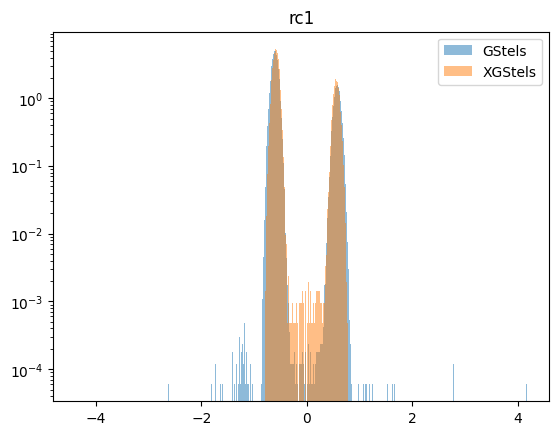

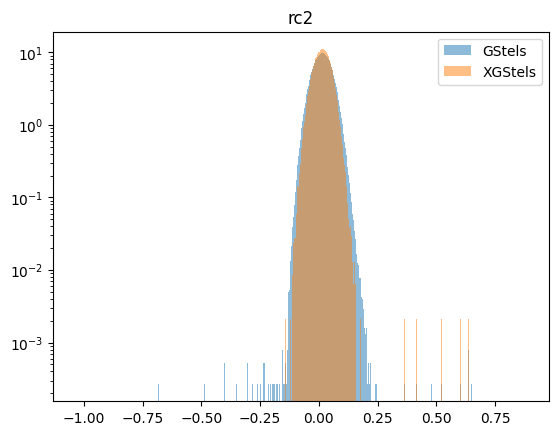

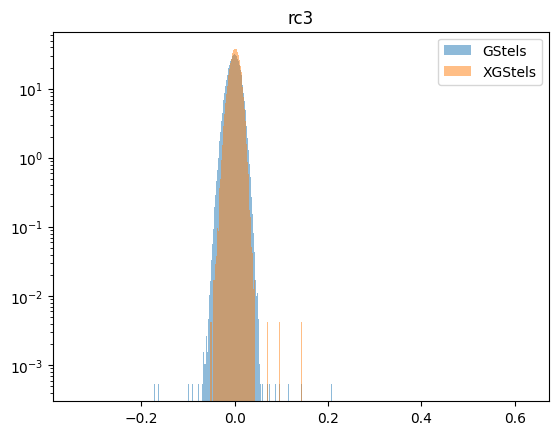

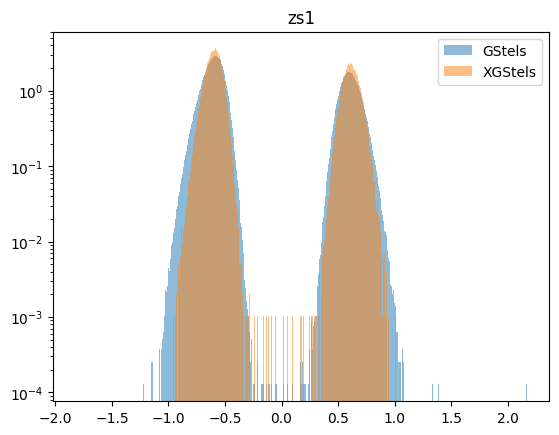

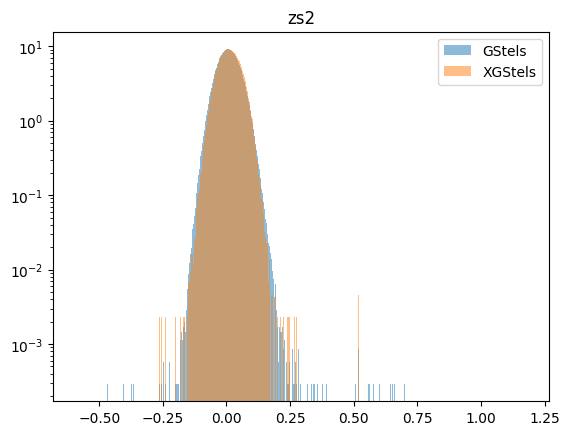

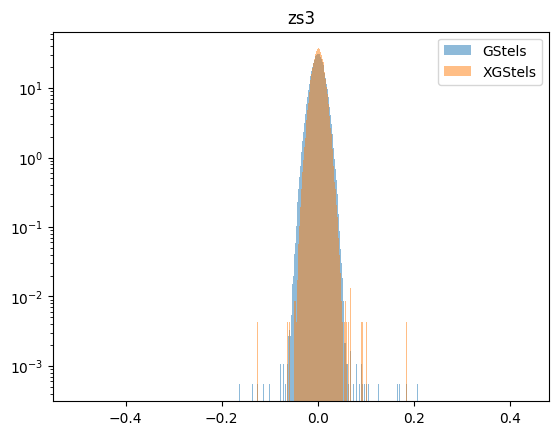

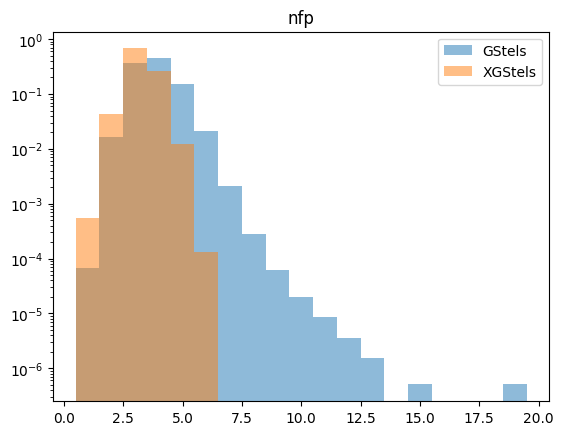

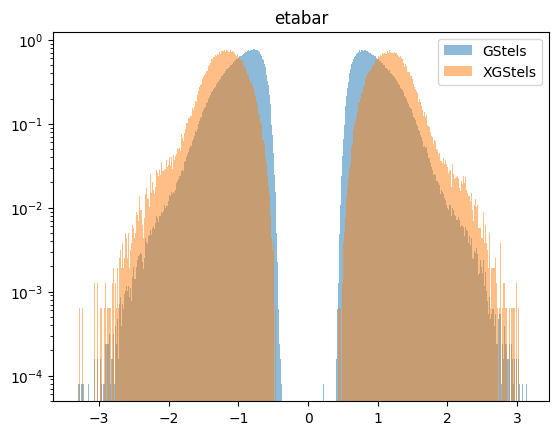

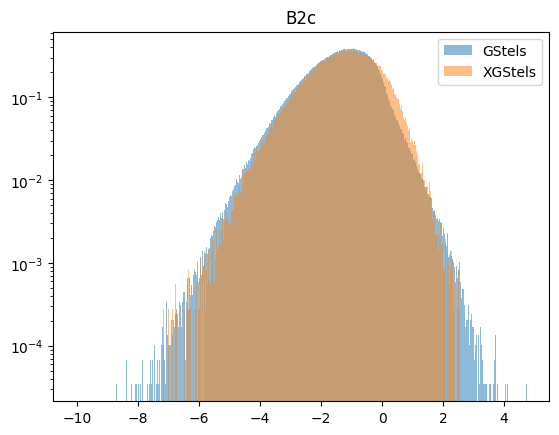

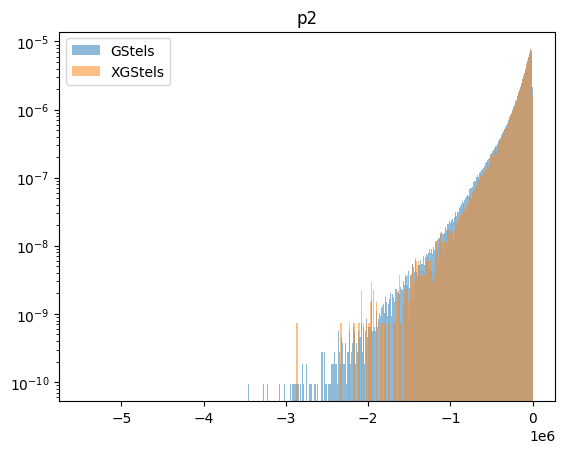

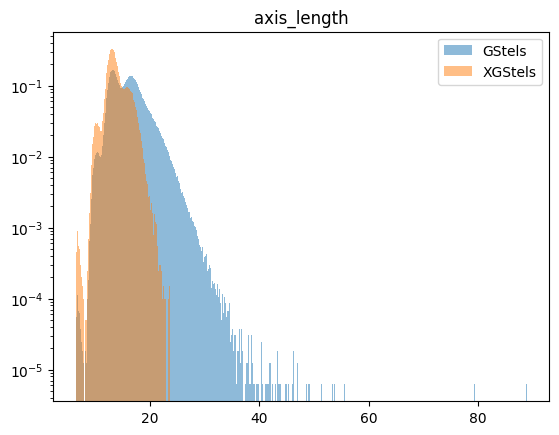

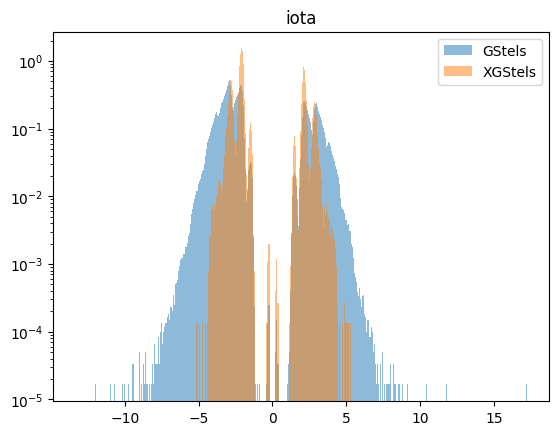

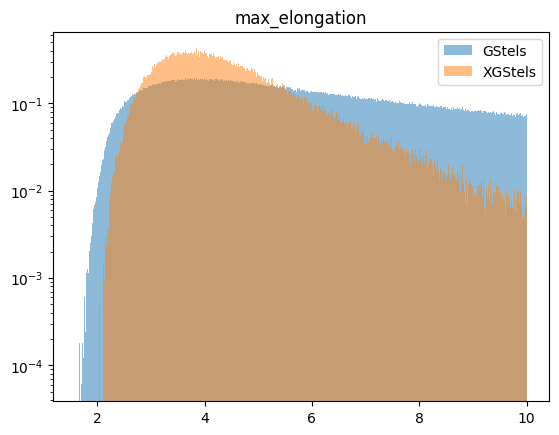

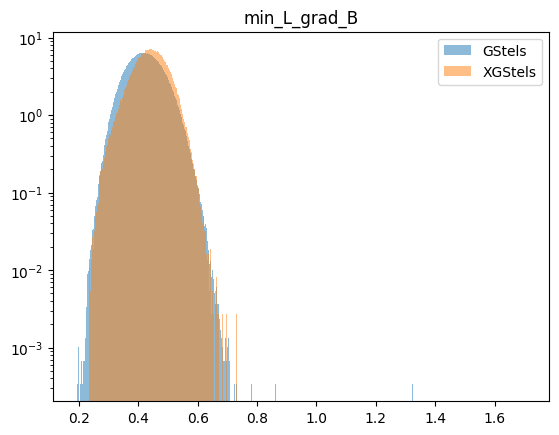

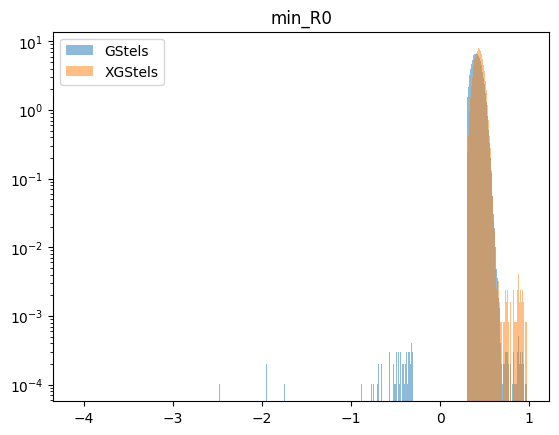

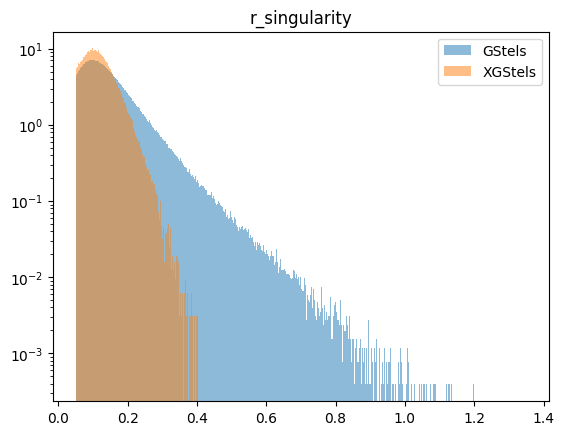

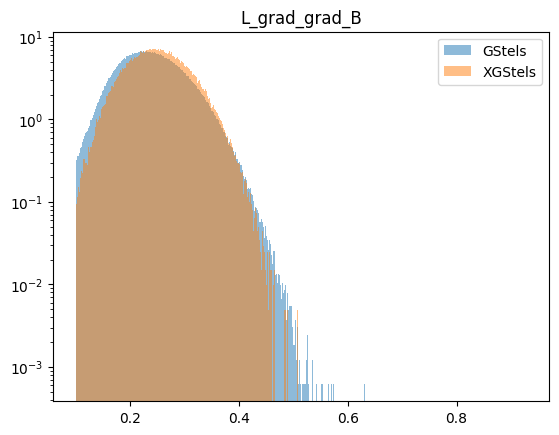

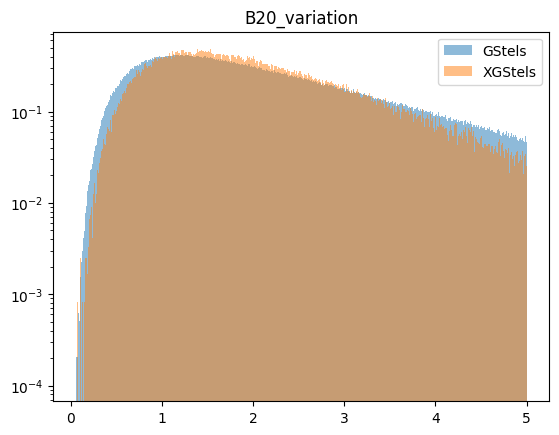

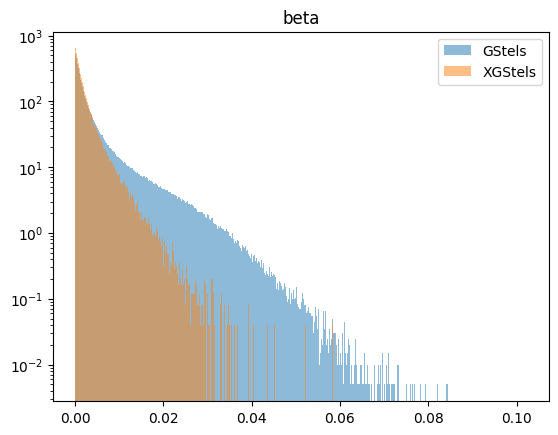

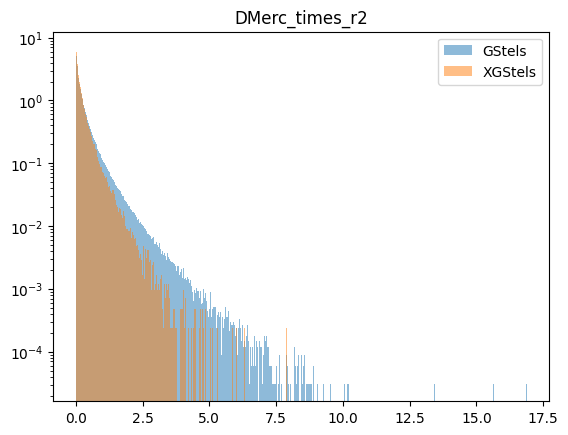

In [101]:
for col in df_gstels.columns:
    values_gstels = df_gstels[col].values
    values_xgstels = df_xgstels[col].values


    
    if col in ['nfp']:
        vmin = np.min(values_gstels) - 0.5
        vmax = np.max(values_gstels) + 0.5
        num = int(round(vmax - vmin + 1))
    
    else:
        vmin = np.min(values_gstels)
        vmax = np.max(values_gstels)
        num = 1001
    
    bins = np.linspace(vmin, vmax, num=num)

    plt.hist(values_gstels, bins, density=True, alpha=0.5, label='GStels', log=True)
    plt.hist(values_xgstels, bins, density=True, alpha=0.5, label='XGStels', log=True)

    plt.title(col)
    plt.legend()
    plt.savefig(f'./images/visual_metrics_data/histograms/{col}.png')
    plt.show()
    plt.close()


# Correlation Matrices

In [102]:
import seaborn as sns 

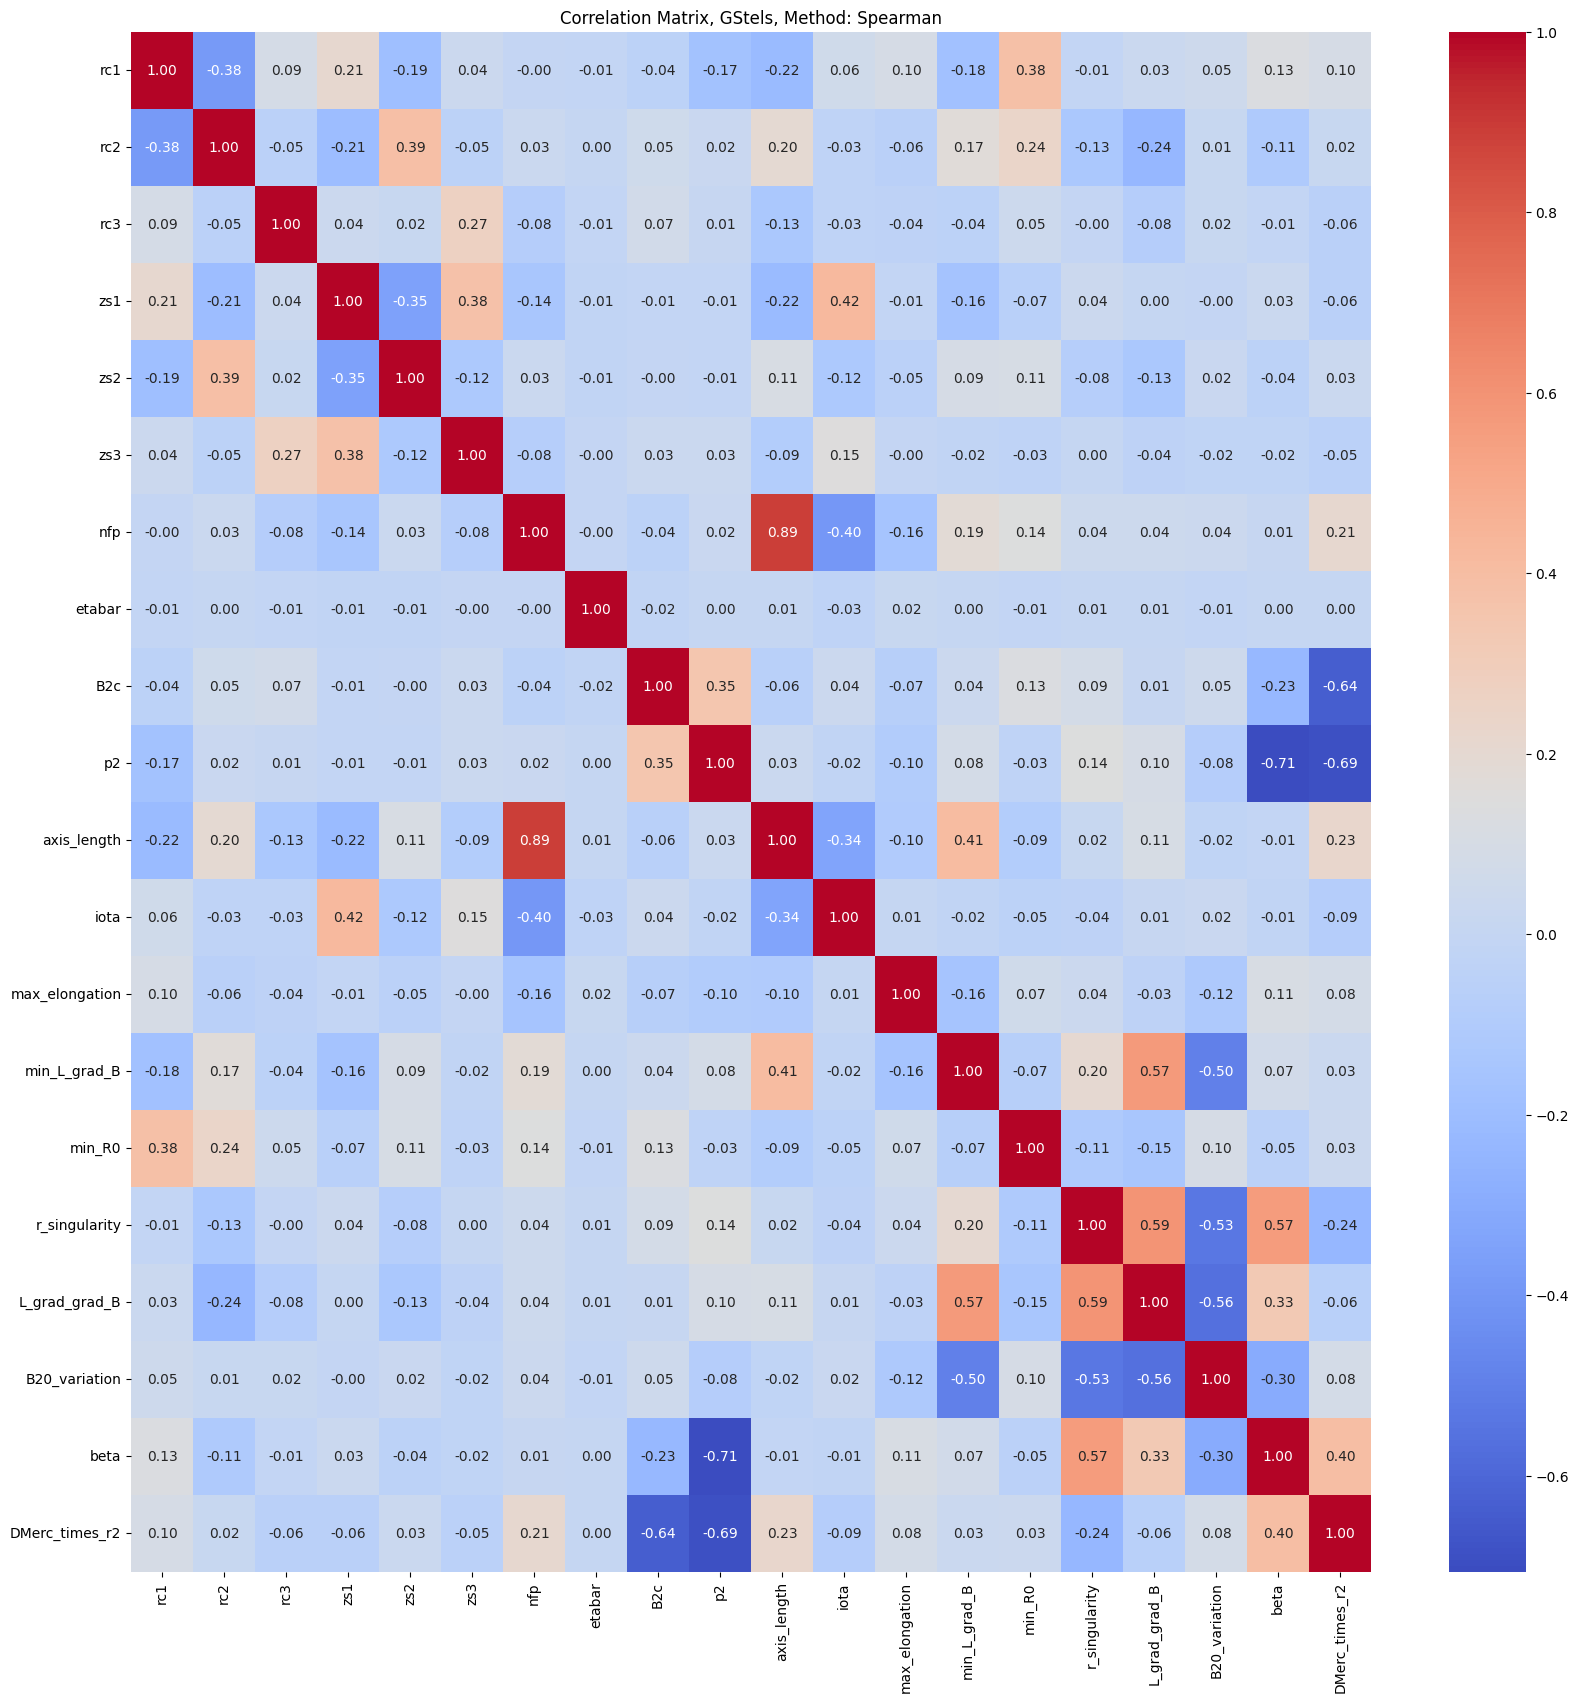

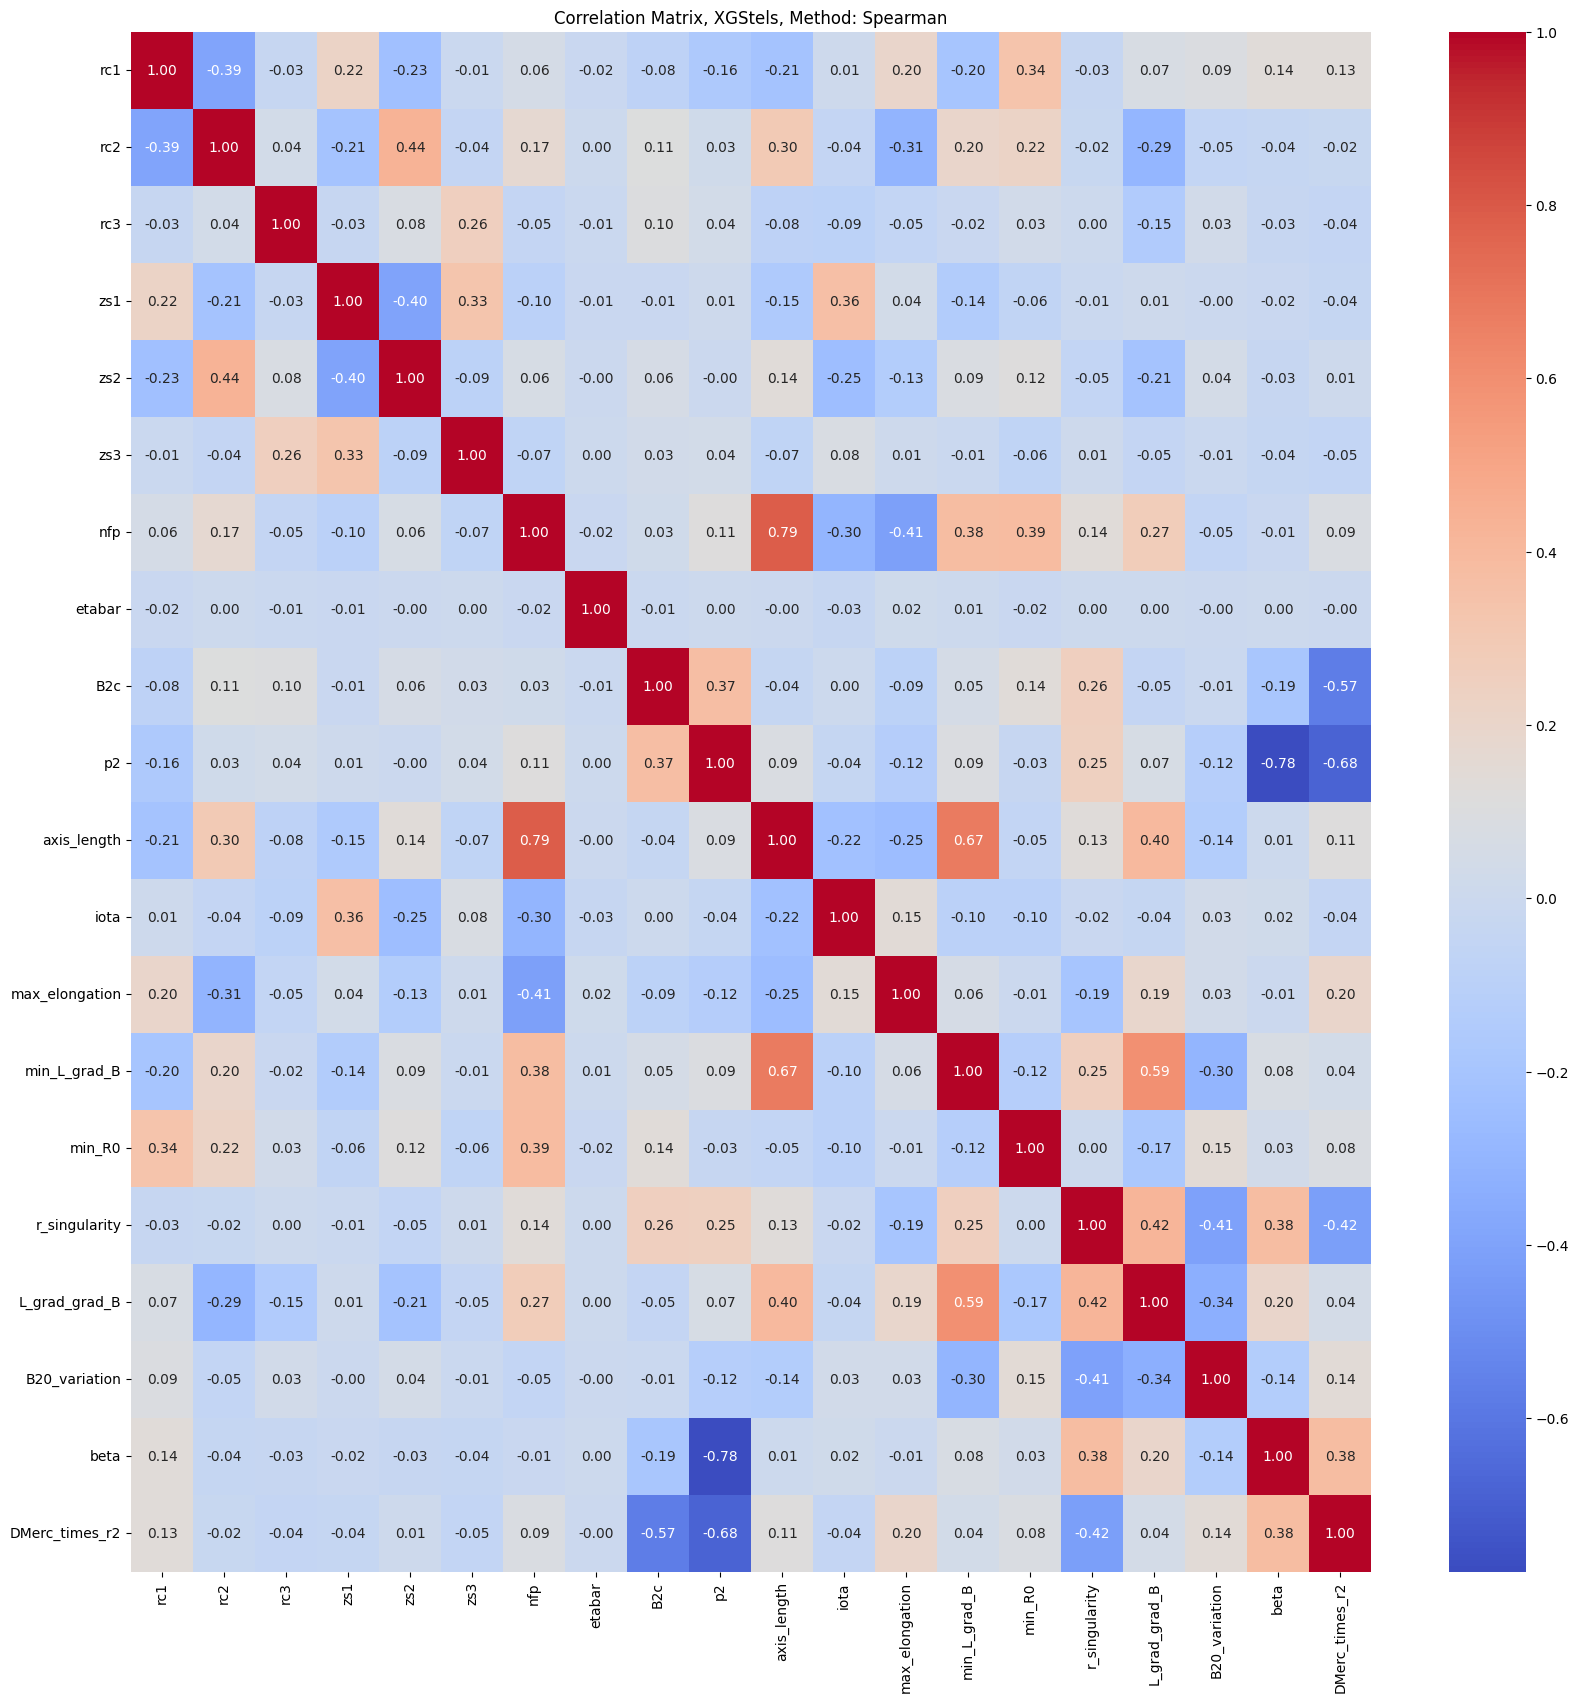

In [103]:
names = ['GStels', 'XGStels']
for i, df in enumerate([df_gstels, df_xgstels]):
    corr = df.corr(method='spearman')

    # Plot the correlation matrix
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix, {names[i]}, Method: Spearman')
    plt.savefig(f'./images/visual_metrics_data/correlations_matrices/{names[i]}.png')
    plt.show()
    plt.close()


# t-SNE 2D

In [104]:
import os
from sklearn.manifold import TSNE
import plotly.graph_objects as go

### GStels

In [105]:
# Mean and Std
mean = df_gstels.mean()
std = df_gstels.std()

# Normalize the data
df_gstels_norm = (df_gstels - mean) / std

In [106]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_gstels_norm_sample = df_gstels_norm.sample(10000, random_state=42)

In [107]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_gstels_norm_sample)

In [108]:
# Add the principal components to the dataframe
df_gstels_norm_sample['tsne-2d-one'] = principalComponents[:,0]
df_gstels_norm_sample['tsne-2d-two'] = principalComponents[:,1]

In [109]:
# df_gstels_norm_sample with beta above 0.01
df_gstels_norm_sample_beta = df_gstels_norm_sample[df_gstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

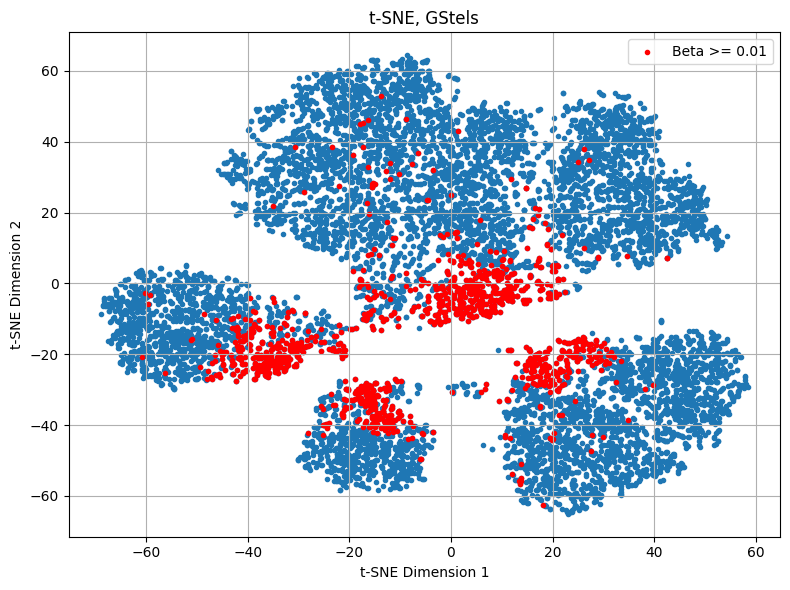

In [110]:
# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_gstels_norm_sample['tsne-2d-one'],
            df_gstels_norm_sample['tsne-2d-two'],
            marker='.')
plt.scatter(df_gstels_norm_sample_beta['tsne-2d-one'],
            df_gstels_norm_sample_beta['tsne-2d-two'],
            marker='.',
            color='red',
            label='Beta >= 0.01')

plt.title('t-SNE, GStels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plt.savefig('./images/visual_metrics_data/t-SNE-2d/GStels.png')

# Show the plot (optional)
plt.show()

### XGStels

In [111]:
# Mean and Std
mean = df_xgstels.mean()
std = df_xgstels.std()

# Normalize the data
df_xgstels_norm = (df_xgstels - mean) / std

In [112]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_xgstels_norm_sample = df_xgstels_norm.sample(10000, random_state=42)

In [113]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_xgstels_norm_sample)

In [117]:
# Add the principal components to the dataframe
df_xgstels_norm_sample['tsne-2d-one'] = principalComponents[:,0]
df_xgstels_norm_sample['tsne-2d-two'] = principalComponents[:,1]

In [118]:
# df_xgstels_norm_sample with beta above 0.01
df_xgstels_norm_sample_beta = df_xgstels_norm_sample[df_xgstels_norm_sample['beta'] >= 0.01]

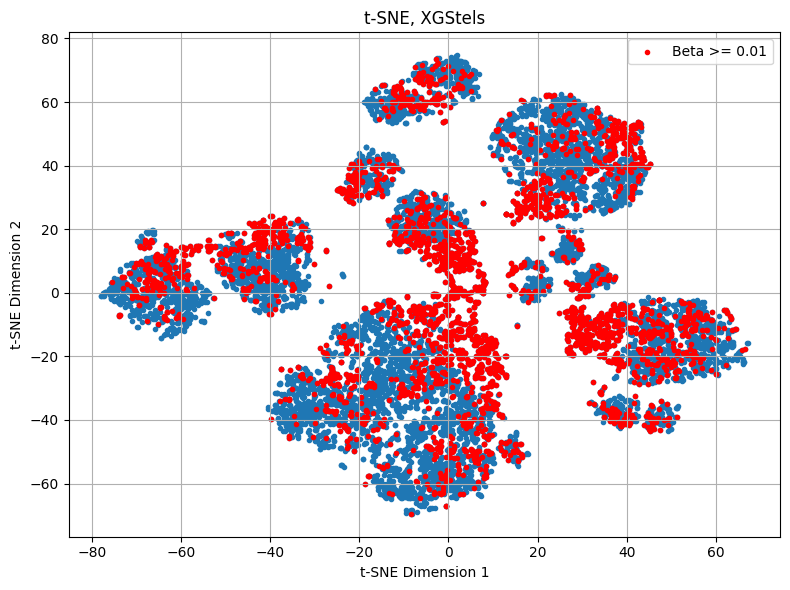

In [119]:
# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_xgstels_norm_sample['tsne-2d-one'],
            df_xgstels_norm_sample['tsne-2d-two'],
            marker='.')
plt.scatter(df_xgstels_norm_sample_beta['tsne-2d-one'],
            df_xgstels_norm_sample_beta['tsne-2d-two'],
            marker='.',
            color='red',
            label='Beta >= 0.01')

plt.title('t-SNE, XGStels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image file
plt.savefig('./images/visual_metrics_data/t-SNE-2D/XGStels.png')

# Show the plot (optional)
plt.show()

# t-SNE 3D

### GStels

In [120]:
# Mean and Std
mean = df_gstels.mean()
std = df_gstels.std()

# Normalize the data
df_gstels_norm = (df_gstels - mean) / std

In [121]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_gstels_norm_sample = df_gstels_norm.sample(10000, random_state=42)

In [122]:
tsne = TSNE(n_components=3, perplexity=50, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_gstels_norm_sample)

In [123]:
# Add the principal components to the dataframe
df_gstels_norm_sample['tsne-3d-one'] = principalComponents[:,0]
df_gstels_norm_sample['tsne-3d-two'] = principalComponents[:,1]
df_gstels_norm_sample['tsne-3d-three'] = principalComponents[:,2]

In [124]:
# df_gstels_norm_sample with beta above 0.01
df_gstels_norm_sample_beta = df_gstels_norm_sample[df_gstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

In [125]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df_gstels_norm_sample['tsne-3d-one'], 
    y=df_gstels_norm_sample['tsne-3d-two'], 
    z=df_gstels_norm_sample['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=df_gstels_norm_sample_beta['tsne-3d-one'], 
    y=df_gstels_norm_sample_beta['tsne-3d-two'], 
    z=df_gstels_norm_sample_beta['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5,
        color='red'
    )
))

# Create layout
layout = go.Layout(
    title='t-SNE in 3D, GStels',
    scene=dict(
        xaxis=dict(title='tsne-3d-one'),
        yaxis=dict(title='tsne-3d-two'),
        zaxis=dict(title='tsne-3d-three')
    )
)

# Combine traces and layout into a figure
fig.update_layout(layout)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'opacity': 0.5, 'size': 5},
              'mode': 'markers',
              'name': 'name',
              'type': 'scatter3d',
              'x': array([ 5.2910676 ,  7.88522   , -0.52407813, ..., -5.973113  ,  6.188153  ,
                           1.338449  ], dtype=float32),
              'y': array([  8.107731, -21.0937  , -21.867857, ...,  10.036837,  16.608809,
                           11.432766], dtype=float32),
              'z': array([ -7.350033 ,  13.236951 ,  -6.5416217, ..., -17.156471 ,  13.630698 ,
                            2.362054 ], dtype=float32)},
             {'marker': {'color': 'red', 'opacity': 0.5, 'size': 5},
              'mode': 'markers',
              'name': 'name',
              'type': 'scatter3d',
              'x': array([16.273901  , -6.2581806 ,  2.862933  , ..., -0.5384692 , -0.52305776,
                           3.6754522 ], dtype=float32),
              'y': array([ 13.371632  ,  -2.3817706 ,  -0.31395686, ..., -10.101553  ,
                          -12.903455  ,  -3.4073107 ], dtype=float32),
              'z': array([ 3.2566571,  6.203987 , -2.7490633, ..., -4.221373 ,  7.1295614,
                          11.4508   ], dtype=float32)}],
    'layout': {'scene': {'xaxis': {'title': {'text': 'tsne-3d-one'}},
                         'yaxis': {'title': {'text': 'tsne-3d-two'}},
                         'zaxis': {'title': {'text': 'tsne-3d-three'}}},
               'template': '...',
               'title': {'text': 't-SNE in 3D, GStels'}}
})

### XGStels

In [126]:
# Mean and Std
mean = df_xgstels.mean()
std = df_xgstels.std()

# Normalize the data
df_xgstels_norm = (df_xgstels - mean) / std

In [127]:
# Sample 10000 points for t-SNE since it is computationally expensive
df_xgstels_norm_sample = df_xgstels_norm.sample(10000, random_state=42)

In [128]:
tsne = TSNE(n_components=3, perplexity=50, n_iter=1000, n_jobs=os.cpu_count())
principalComponents = tsne.fit_transform(df_xgstels_norm_sample)

In [129]:
# Add the principal components to the dataframe
df_xgstels_norm_sample['tsne-3d-one'] = principalComponents[:,0]
df_xgstels_norm_sample['tsne-3d-two'] = principalComponents[:,1]
df_xgstels_norm_sample['tsne-3d-three'] = principalComponents[:,2]

In [130]:
# df_gstels_norm_sample with beta above 0.01
df_xgstels_norm_sample_beta = df_xgstels_norm_sample[df_xgstels_norm_sample['beta'] >= (0.01 - mean["beta"])/std["beta"]]

In [131]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df_xgstels_norm_sample['tsne-3d-one'], 
    y=df_xgstels_norm_sample['tsne-3d-two'], 
    z=df_xgstels_norm_sample['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=df_xgstels_norm_sample_beta['tsne-3d-one'], 
    y=df_xgstels_norm_sample_beta['tsne-3d-two'], 
    z=df_xgstels_norm_sample_beta['tsne-3d-three'], 
    mode='markers',
    name='name',
    marker=dict(
        size=5,
        opacity=0.5,
        color='red'
    )
))

# Create layout
layout = go.Layout(
    title='t-SNE in 3D, XGStels',
    scene=dict(
        xaxis=dict(title='tsne-3d-one'),
        yaxis=dict(title='tsne-3d-two'),
        zaxis=dict(title='tsne-3d-three')
    )
)

# Combine traces and layout into a figure
fig.update_layout(layout)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'opacity': 0.5, 'size': 5},
              'mode': 'markers',
              'name': 'name',
              'type': 'scatter3d',
              'x': array([-0.98862463, 12.534427  , -7.1857777 , ...,  5.13578   , 16.015661  ,
                          13.039213  ], dtype=float32),
              'y': array([-9.482812 , -1.884534 ,  2.0656505, ..., -4.241208 ,  9.359335 ,
                           8.134178 ], dtype=float32),
              'z': array([ -2.3594246, -19.609629 ,  -6.4317107, ..., -27.837467 ,  14.070443 ,
                           18.852243 ], dtype=float32)},
             {'marker': {'color': 'red', 'opacity': 0.5, 'size': 5},
              'mode': 'markers',
              'name': 'name',
              'type': 'scatter3d',
              'x': array([-7.1857777 , -0.22137155, -9.824599  , ...,  0.54454434, -6.2096267 ,
                          -6.7393284 ], dtype=float32),
              'y': array([ 2.0656505, 12.677117 ,  5.7605524, ...,  8.836217 ,  0.2601838,
                           1.1720008], dtype=float32),
              'z': array([-6.4317107,  0.6678671, 10.822879 , ..., -2.1331587, -6.7350273,
                          -8.051406 ], dtype=float32)}],
    'layout': {'scene': {'xaxis': {'title': {'text': 'tsne-3d-one'}},
                         'yaxis': {'title': {'text': 'tsne-3d-two'}},
                         'zaxis': {'title': {'text': 'tsne-3d-three'}}},
               'template': '...',
               'title': {'text': 't-SNE in 3D, XGStels'}}
})